<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Свёрточные-нейронные-сети:-CIFAR10" data-toc-modified-id="Свёрточные-нейронные-сети:-CIFAR10-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>Свёрточные нейронные сети: CIFAR10</b></a></span><ul class="toc-item"><li><span><a href="#Свёрточная-нейросеть-на-PyTorch" data-toc-modified-id="Свёрточная-нейросеть-на-PyTorch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><b>Свёрточная нейросеть на PyTorch</b></a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><b>CIFAR10</b></a></span></li><li><span><a href="#Полезные-ссылки" data-toc-modified-id="Полезные-ссылки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><b>Полезные ссылки</b></a></span></li></ul></li></ul></div>

---

<h2 style="text-align: center;"><b>Свёрточные нейронные сети: CIFAR10</b></h3>

---

В этом ноутбке мы посмотрим, насколько хорошо CNN будут предсказывать классы на более сложном датасете картинок -- CIFAR10. 

**Внимание:** Рассматривается ***задача классификации изображений***.

***Свёрточная нейросеть (Convolutional Neural Network, CNN)*** - это многослойная нейросеть, имеющая в своей архитектуре помимо *полносвязных слоёв* (а иногда их может и не быть) ещё и **свёрточные слои (Conv Layers)** и **pooling-слои (Pool Layers)**.  

Собственно, название такое эти сети получили потому, что в основе их работы лежит операция **свёртки**.

Сразу же стоит сказать, что свёрточные нейросети **были придуманы прежде всего для задач, связанных с изображениями**, следовательно, на вход они тоже "ожидают" изображение.

* Например, вот так выглядит неглубокая свёрточная нейросеть, имеющая такую архитектуру:  
`Input -> Conv 5x5 -> Pool 2x2 -> Conv 5x5 -> Pool 2x2 -> FC -> Output`

<img src="https://camo.githubusercontent.com/269e3903f62eb2c4d13ac4c9ab979510010f8968/68747470733a2f2f7261772e6769746875622e636f6d2f746176677265656e2f6c616e647573655f636c617373696669636174696f6e2f6d61737465722f66696c652f636e6e2e706e673f7261773d74727565" width=800, height=600>  
  
Свёрточные нейросети (простые, есть и намного более продвинутые) почти всегда строятся по следующему правилу:  

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*L -> FC`  

то есть:  

1). ***Входной слой***: batch картинок -- тензор размера `(batch_size, H, W, C)` или `(batch_size, C, H, W)`

2). $M$ блоков (M $\ge$ 0) из свёрток и pooling-ов, причём именно в том порядке, как в формуле выше. Все эти $M$ блоков вместе называют ***feature extractor*** свёрточной нейросети, потому что эта часть сети отвечает непосредственно за формирование новых, более сложных признаков поверх тех, которые подаются (то есть, по аналогии с MLP, мы опять же переходим к новому признаковому пространству, однако здесь оно строится сложнее, чем в обычных многослойных сетях, поскольку используется операция свёртки)  

3). $L$ штук FullyConnected-слоёв (с активациями). Эту часть из $L$ FC-слоёв называют ***classificator***, поскольку эти слои отвечают непосредственно за предсказание нужно класса (сейчас рассматривается задача классификации изображений).


<h3 style="text-align: center;"><b>Свёрточная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (`weight_decay`, для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Так как мы сейчас рассматриваем **архитектуру CNN**, то, помимо этих компонент, в свёрточной нейросети можно настроить следующие вещи:  

- (в каждом ConvLayer) **размер фильтров (окна свёртки)** (`kernel_size`)
- (в каждом ConvLayer) **количество фильтров** (`out_channels`)  
- (в каждом ConvLayer) размер **шага окна свёртки (stride)** (`stride`)  
- (в каждом ConvLayer) **тип padding'а** (`padding`)  


- (в каждом PoolLayer) **размер окна pooling'a** (`kernel_size`)  
- (в каждом PoolLayer) **шаг окна pooling'а** (`stride`)  
- (в каждом PoolLayer) **тип pooling'а** (`pool_type`)  
- (в каждом PoolLayer) **тип padding'а** (`padding`)

<h3 style="text-align: center;"><b>CIFAR10</b></h3>

<img src="https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png" width=500, height=400>

**CIFAR10:** это набор из 60k картинок 32х32х3, 50k которых составляют обучающую выборку, и оставшиеся 10k - тестовую. Классов в этом датасете 10: `'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'`.

In [0]:
# !pip install torch torchvision

In [1]:
import torch
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tqdm_notebook

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


(32, 32, 3)


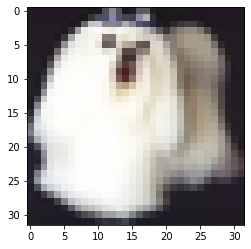

In [26]:
# случайный индекс от 0 до размера тренировочной выборки
i = np.random.randint(low=0, high=50000)
plt.imshow(trainloader.dataset.data[i]);

Напишем свёрточную нейросеть для предсказания на CIFAR10.

In [27]:
import torch.nn as nn
import torch.nn.functional as F

In [28]:
class SimpleConvNet(torch.nn.Module):
    def __init__(self):
        # вызов конструктора класса nn.Module()
        super(SimpleConvNet, self).__init__()
        # feature extractor
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # classificator
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 5 * 5 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Обучим:

In [29]:
from tqdm import tqdm_notebook

In [30]:
net = SimpleConvNet()

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(3)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # выводим качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

<ipython-input-30-44899e56ed12>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(3)):


  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-30-44899e56ed12>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 2.026
[1,  4000] loss: 1.781
[1,  6000] loss: 1.685
[1,  8000] loss: 1.620
[1, 10000] loss: 1.595
[1, 12000] loss: 1.561


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.529
[2,  4000] loss: 1.499
[2,  6000] loss: 1.480
[2,  8000] loss: 1.466
[2, 10000] loss: 1.441
[2, 12000] loss: 1.434


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 1.414
[3,  4000] loss: 1.375
[3,  6000] loss: 1.397
[3,  8000] loss: 1.369
[3, 10000] loss: 1.342
[3, 12000] loss: 1.337
Обучение закончено


Посмотрим на accuracy на тестовом датасете:

In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 49 %
Accuracy of   car : 60 %
Accuracy of  bird : 38 %
Accuracy of   cat : 30 %
Accuracy of  deer : 31 %
Accuracy of   dog : 43 %
Accuracy of  frog : 81 %
Accuracy of horse : 63 %
Accuracy of  ship : 63 %
Accuracy of truck : 58 %


Проверим работу нейросети визуально (позапускайте ячейку несколько раз):

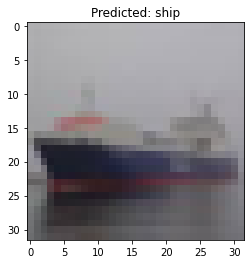

In [46]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    
    image = transform(image)  # не забудем отмасштабировать!
    
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')

visualize_result(i)

Улучшим свёрточную нейросеть: поэкспериментируем с архитектурой (количество слоёв, порядок слоёв), с гиперпараметрами слоёв (размеры kernel_size, размеры pooling'а, количество kernel'ов в свёрточном слое) и с гиперпараметрами, указанными в "Компоненты нейросети" (см. памятку выше).

In [47]:
class BetterConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора класса nn.Module()
        super(BetterConvNet, self).__init__()
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        
        self.fc1 = nn.Linear(3 * 3 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(self.conv3(F.relu(self.conv2(x))))
#         print(x.shape)
        x = x.view(-1, 3 * 3 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Обучим:

In [48]:
from tqdm import tqdm_notebook

In [49]:
net = BetterConvNet()

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(5)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

<ipython-input-49-fe8fee39d5dd>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(5)):


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-49-fe8fee39d5dd>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 1.928
[1,  4000] loss: 1.687
[1,  6000] loss: 1.590
[1,  8000] loss: 1.518
[1, 10000] loss: 1.476
[1, 12000] loss: 1.443


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.399
[2,  4000] loss: 1.347
[2,  6000] loss: 1.340
[2,  8000] loss: 1.341
[2, 10000] loss: 1.307
[2, 12000] loss: 1.309


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 1.230
[3,  4000] loss: 1.258
[3,  6000] loss: 1.264
[3,  8000] loss: 1.236
[3, 10000] loss: 1.244
[3, 12000] loss: 1.242


  0%|          | 0/12500 [00:00<?, ?it/s]

[4,  2000] loss: 1.169
[4,  4000] loss: 1.189
[4,  6000] loss: 1.187
[4,  8000] loss: 1.225
[4, 10000] loss: 1.194
[4, 12000] loss: 1.192


  0%|          | 0/12500 [00:00<?, ?it/s]

[5,  2000] loss: 1.122
[5,  4000] loss: 1.154
[5,  6000] loss: 1.144
[5,  8000] loss: 1.151
[5, 10000] loss: 1.155
[5, 12000] loss: 1.163
Обучение закончено


In [50]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 71 %
Accuracy of  bird : 43 %
Accuracy of   cat : 52 %
Accuracy of  deer : 49 %
Accuracy of   dog : 51 %
Accuracy of  frog : 62 %
Accuracy of horse : 50 %
Accuracy of  ship : 68 %
Accuracy of truck : 63 %


Если качество ~70% в среднем, то текущая нейросеть вполне неплоха (однако на этом датасете известны архитектуры, дающие 95+% качества).

Посмотрим визуально на работу нейросети:

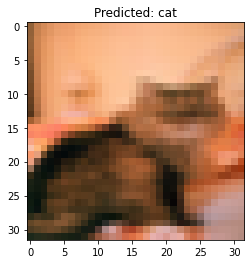

In [58]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    
    image = transform(image)  # не забудем отмасштабировать!
    
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')

visualize_result(i)

Попробуем обучить ещё более сильную нейросеть:

In [59]:
class StrongConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора класса nn.Module()
        super(StrongConvNet, self).__init__()
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.dropout = nn.Dropout(p=0.2)
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(16)
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.bn5 = nn.BatchNorm2d(32)
        
        self.fc1 = nn.Linear(4 * 4 * 32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.pool(x)
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.pool(x)
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.bn5(F.relu(self.conv5(x)))
#         print(x.shape)
        x = x.view(-1, 4 * 4 * 32)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Обучим:

In [60]:
from tqdm import tqdm_notebook

In [61]:
from torch.optim import lr_scheduler

In [62]:
net = StrongConvNet()

loss_fn = torch.nn.CrossEntropyLoss()

num_epochs = 5

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
learning_rate = 1e-3
# новая фишка -- динамически изменяем LR
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

for epoch in tqdm_notebook(range(num_epochs)):
    
    scheduler.step()
    
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        
        optimizer.zero_grad()

        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

<ipython-input-62-904c0e5366aa>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(num_epochs)):


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\gimly\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
<ipython-input-62-904c0e5366aa>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/12500 [00:00<?, ?it/s]

[1,  2000] loss: 1.858
[1,  4000] loss: 1.684
[1,  6000] loss: 1.579
[1,  8000] loss: 1.493
[1, 10000] loss: 1.451
[1, 12000] loss: 1.412


  0%|          | 0/12500 [00:00<?, ?it/s]

[2,  2000] loss: 1.292
[2,  4000] loss: 1.299
[2,  6000] loss: 1.253
[2,  8000] loss: 1.269
[2, 10000] loss: 1.237
[2, 12000] loss: 1.218


  0%|          | 0/12500 [00:00<?, ?it/s]

[3,  2000] loss: 1.118
[3,  4000] loss: 1.100
[3,  6000] loss: 1.114
[3,  8000] loss: 1.094
[3, 10000] loss: 1.089
[3, 12000] loss: 1.064


  0%|          | 0/12500 [00:00<?, ?it/s]

[4,  2000] loss: 1.007
[4,  4000] loss: 0.995
[4,  6000] loss: 0.998
[4,  8000] loss: 0.976
[4, 10000] loss: 0.975
[4, 12000] loss: 0.985


  0%|          | 0/12500 [00:00<?, ?it/s]

[5,  2000] loss: 0.935
[5,  4000] loss: 0.956
[5,  6000] loss: 0.950
[5,  8000] loss: 0.963
[5, 10000] loss: 0.962
[5, 12000] loss: 0.953
Обучение закончено


In [63]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 76 %
Accuracy of  bird : 49 %
Accuracy of   cat : 38 %
Accuracy of  deer : 53 %
Accuracy of   dog : 51 %
Accuracy of  frog : 70 %
Accuracy of horse : 67 %
Accuracy of  ship : 76 %
Accuracy of truck : 69 %


Посмотрим визуально на работу нейросети:

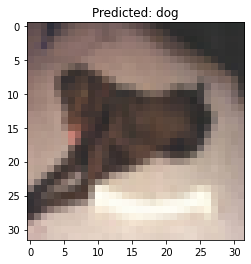

In [68]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.data[index]
    plt.imshow(image)
    
    image = transform(image)  # не забудем отмасштабировать!
    
    y_pred = net(image.view(1, 3, 32, 32))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')

visualize_result(i)

Даже обучив более глубокую и прокаченную (BatchNorm, Dropout) нейросеть на этих данных мы видим, что качество нас всё ещё не устраивает, в реальной жизни необходимо ошибаться не больше, чем на 5%, а часто и это уже много. Как же быть, ведь свёрточные нейросети должны хорошо классифицировать изображения?  

К сожалению, обучение нейросети с нуля на не очень большой выборке (а здесь она именно такая) часто приводит к переобучению, что плохо сказывается на тестовом качестве.  

Для того, чтобы получить более качественную модель, часто **до**обучают сильную нейросеть, обученную на ImageNet, то есть используют технику Transfer Learning.

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (официальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). Курс Стэнфорда:  http://cs231n.github.io/

3). Практически исчерпывающая информация по основам свёрточных нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/convolutional-networks/  
http://cs231n.github.io/understanding-cnn/  
http://cs231n.github.io/transfer-learning/

4). Видео о Computer Vision от Andrej Karpathy: https://www.youtube.com/watch?v=u6aEYuemt0M